In [1]:
# Necessary packages
import sys
sys.path.insert(0, '/home/giulia/Provenance')
import ipynb.fs.full.provenance as pr
import ipynb.fs.full.prov_provenance as prov_pr
import pandas as pd
import numpy as np

from IPython.display import Image

# Specify where to save the processed files as savepath
savepath = 'results/SpaceTransf_prov/'

In [2]:
# Files get loaded from fairCorrect github repository
url = 'https://raw.githubusercontent.com/vladoxNCL/fairCorrect/master/Datasets/'
#df = pd.read_csv('avocado.csv', header=0)
df = pd.read_csv(url + 'compas-scores-two-years.csv', header=0)

# select relevant columns
df =df[['age', 'c_charge_degree', 'race', 'sex', 'priors_count', 'days_b_screening_arrest',
        'two_year_recid', 'c_jail_in', 'c_jail_out']]

df =df[['age', 'c_jail_in', 'c_jail_out']]
df = df[:3]

# Create a new provenance document 
p = prov_pr.Provenance(df, savepath)


In [3]:
#SPACE TRANSFORMATION

# convert jailtime to days
df['jailtime'] = (pd.to_datetime(df.c_jail_out) - pd.to_datetime(df.c_jail_in)).dt.days

#GET PROVENANCE
d = p.get_prov_space_transformation(df,['c_jail_out','c_jail_in'])

get_prov_space_transformation function took 3.260 ms


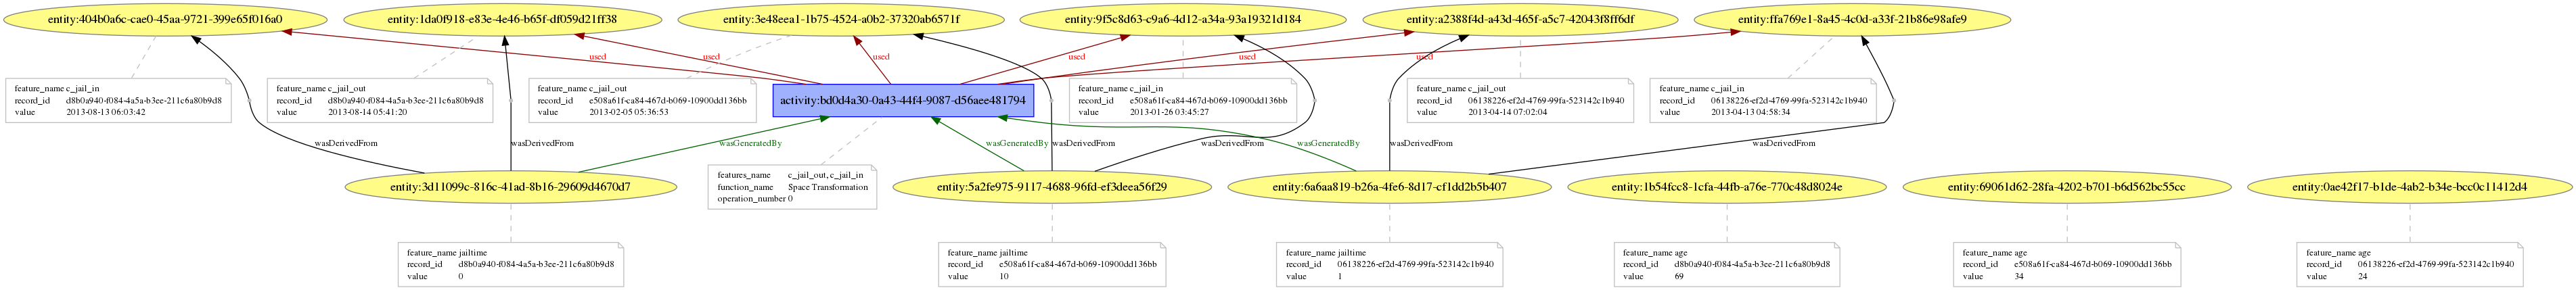

In [4]:
namefile = 'space_transf_prov'
p.save_all_graph(namefile)
Image(savepath + namefile + '.png')

In [5]:
#DROP FEATURE

#drop jail in and out dates
df = df.drop(['c_jail_in', 'c_jail_out'], axis=1)

#GET PROVENANCE
d = p.get_prov_dim_reduction(df)

get_prov_dim_reduction function took 6.602 ms


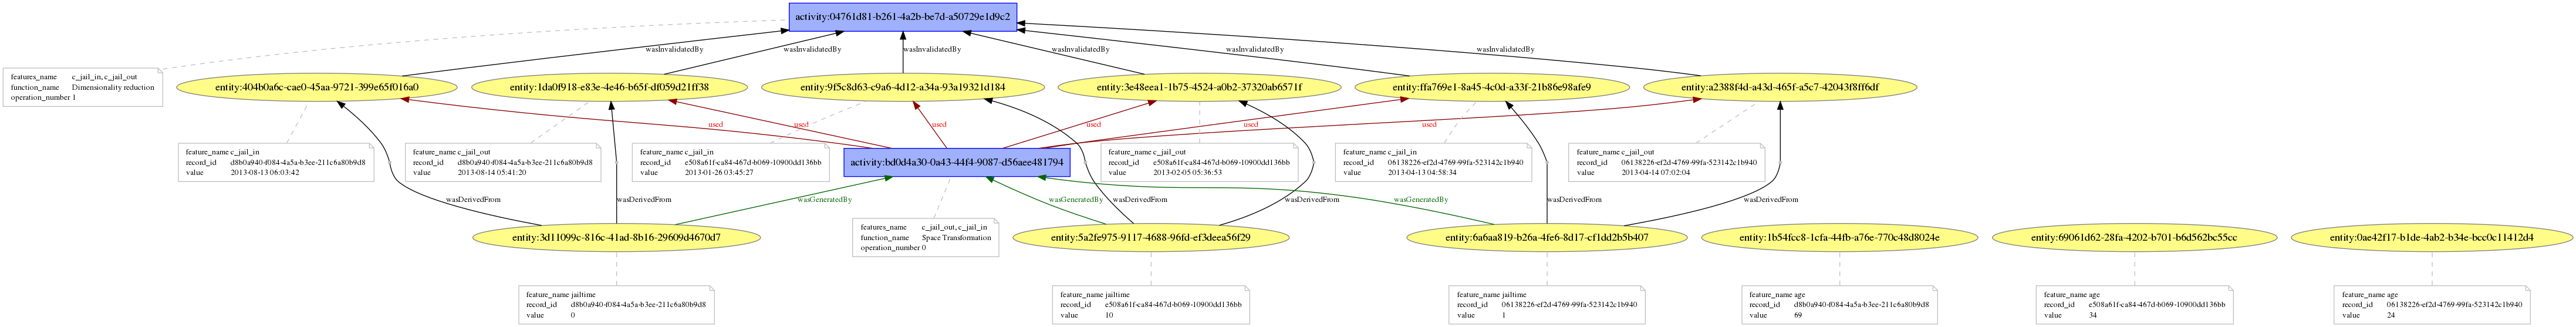

In [6]:
namefile = 'final_drop'
p.save_all_graph(namefile)
Image(savepath + namefile + '.png')